# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import shap
import joblib

# Load the Iris dataset

In [2]:
iris = pd.read_csv(r"C:\Users\admin\Downloads\IRIS.csv")

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Separate the features and target

In [6]:
X = iris.drop("species", axis=1).values  
y = iris["species"].values  

# Convert the species column to numeric values using LabelEncoder

In [7]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Model

In [9]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [10]:
y_pred_svm = svm_model.predict(X_test)
print("SVM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svm)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}\n")

svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)  
print(f"Cross-validation Scores: {svm_cv_scores}")
print(f"Mean Accuracy: {np.mean(svm_cv_scores)}\n")

SVM Model Evaluation:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Cross-validation Scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean Accuracy: 0.9800000000000001



# Random Forest Model

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}\n")

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-validation Scores: {rf_cv_scores}")
print(f"Mean Accuracy: {np.mean(rf_cv_scores)}\n")

Random Forest Model Evaluation:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Cross-validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9666666666666668



# Logistic Regression Model

In [13]:
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [14]:
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_lr)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lr)}\n")

lr_cv_scores = cross_val_score(lr_model, X, y, cv=5)
print(f"Cross-validation Scores: {lr_cv_scores}")
print(f"Mean Accuracy: {np.mean(lr_cv_scores)}\n")

Logistic Regression Model Evaluation:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Cross-validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9733333333333334



# Save the trained SVM model to a file

In [15]:
joblib.dump(svm_model, 'svm_model_iris.pkl')
print("SVM model saved successfully!")


SVM model saved successfully!


# Initialize SHAP explainer

In [16]:
explainer = shap.KernelExplainer(svm_model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

# Visualize SHAP summary plot

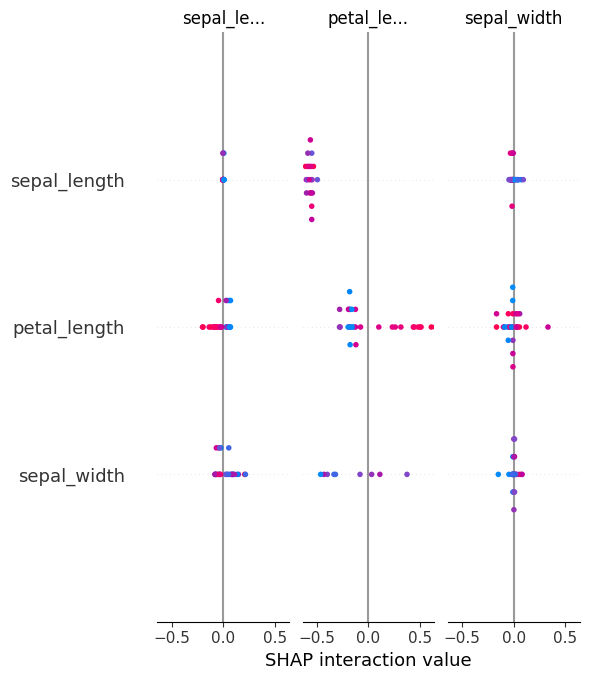

In [17]:
shap.summary_plot(shap_values, X_test, feature_names=iris.drop('species', axis=1).columns)